In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cmocean

In [2]:
Y_sim = np.load('greenland_ff_3611.npy', mmap_mode='r')
print(Y_sim.shape)
t_sim = np.loadtxt('../../expdesign/greenland_train_standard.csv',
    delimiter=',', skiprows=1)
Y_test = np.load('../test/greenland_ff_3611.npy')
t_test = np.loadtxt('../../expdesign/greenland_test_standard.csv',
    delimiter=',', skiprows=1)

y_obs = np.load('../test/RUN/output_091/ff.npy')[3611,:]
Y_test[:,90] = y_obs[-366:-1]

(365, 512)


In [3]:
sim_num = 90
node = 3611

## Distance from nearest training simulations

In [4]:
# Compute distance between all training and test runs
dtheta = t_sim[:,None,:] - t_test[None,:,:]
sim_dist_test = np.linalg.norm(dtheta, axis=-1)
min_dist_test = np.min(sim_dist_test, axis=0)
print(sim_dist_test.shape)
print(min_dist_test.shape)

(512, 100)
(100,)


In [5]:
# Compute distance between all training runs
dtheta = t_sim[:,None,:] - t_sim[None,:,:]
sim_dist_train = np.linalg.norm(dtheta, axis=-1)
np.fill_diagonal(sim_dist_train, np.nan)
min_dist_train = np.nanmin(sim_dist_train, axis=1)
print(sim_dist_train.shape)
print(min_dist_train.shape)

(512, 512)
(512,)


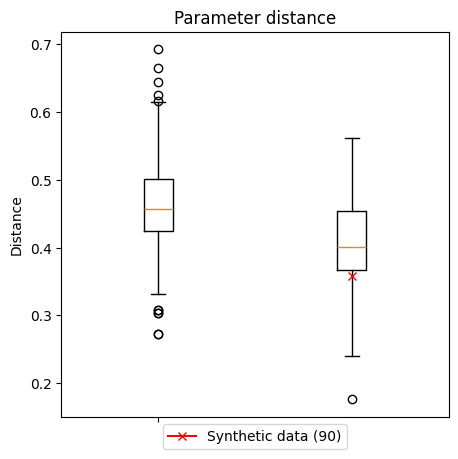

In [6]:
fig,ax = plt.subplots(figsize=(5, 5))
ax.boxplot([min_dist_train, min_dist_test])
ax.set_ylabel('Distance')
ax.plot(2, min_dist_test[sim_num], marker='x', color='r', label='Synthetic data (90)')
ax.legend(bbox_to_anchor=(0,-0.1,1,0.1), loc='upper center')
ax.set_title('Parameter distance')
ax.set_xticks([1],[''])

## Distance from nearest training simulations in sensitive parameters

In [7]:
# Compute distance between all training and test runs
dtheta = t_test[:,None,:] - t_sim[None,:,:]
sim_dist = np.linalg.norm(dtheta[:,:,np.array([1,3,5,7])], axis=-1)
print(sim_dist.shape)
min_dist = np.min(sim_dist, axis=1)
print(min_dist.shape)

(100, 512)
(100,)


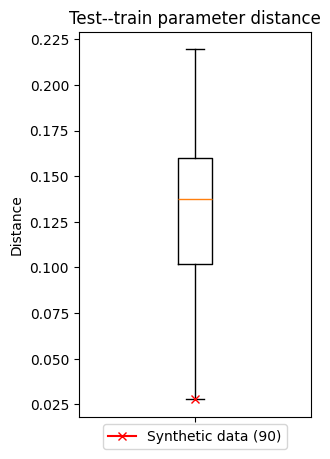

In [8]:
fig,ax = plt.subplots(figsize=(3, 5))
ax.boxplot(min_dist)
ax.set_ylabel('Distance')
ax.plot(1, min_dist[sim_num], marker='x', color='r', label='Synthetic data (90)')
ax.legend(bbox_to_anchor=(0,-0.1,1,0.1), loc='upper center')
ax.set_title('Test--train parameter distance')
ax.set_xticks([1],[''])

## How different are neighbouring training simulations?

In [9]:
neighbourhood = 3

In [10]:
y_mean_neighbour_train = np.zeros((365, 512))
# yind = node*365 + np.arange(365)
for i in range(512):
    yi = Y_sim[:,i]
    neighb = np.argsort(sim_dist_train[:, i])[:3]
    y_mean_neighbour_train[:, i] = np.mean(Y_sim[:, neighb], axis=1)
    
y_train_neighb_dist = np.linalg.norm(Y_sim - y_mean_neighbour_train, axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7faff7fb9590>,
 'caps': [<matplotlib.lines.Line2D at 0x7faff7fb9810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faff7fb9450>],
 'medians': [<matplotlib.lines.Line2D at 0x7faff7fb9a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faff7fb9bd0>],
 'means': []}

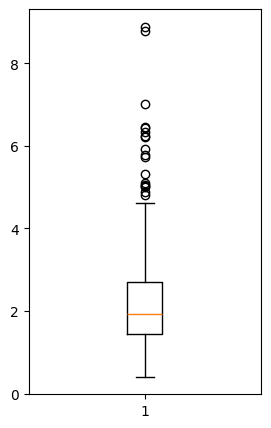

In [11]:
fig,ax = plt.subplots(figsize=(3,5))
ax.boxplot(y_train_neighb_dist)

Text(0.5, 0, 'Day of 2012')

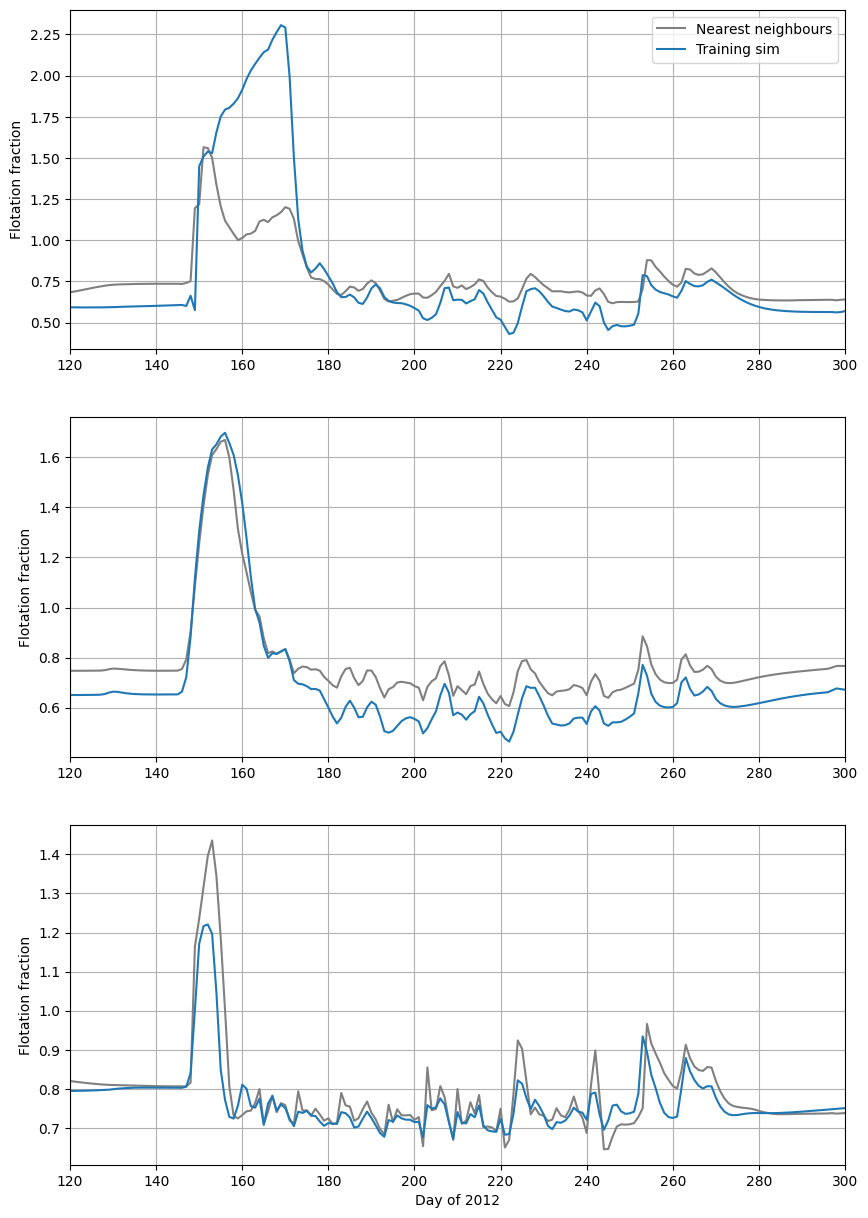

In [12]:
fig,axs = plt.subplots(figsize=(10, 15), nrows=3)
qq = np.array([0.95, 0.5, 0.025])
for i in range(3):
    qi = np.argmin(np.abs(y_train_neighb_dist - np.quantile(y_train_neighb_dist, qq[i])))
    
    ax = axs[i]
    ax.plot(y_mean_neighbour_train[:, qi], color='gray', label='Nearest neighbours')
    ax.plot(Y_sim[:, qi], label='Training sim')
    ax.set_xlim([120, 300])
    ax.grid()
    ax.set_ylabel('Flotation fraction')

axs[0].legend(loc='upper right')
axs[-1].set_xlabel('Day of 2012')

## How different are test simulations from the nearest training simulations?

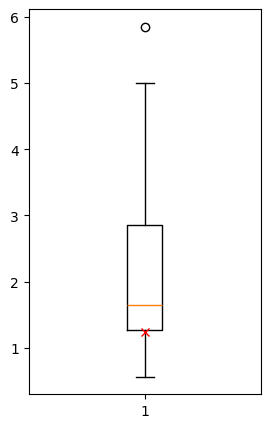

In [13]:
y_mean_neighbour_test = np.zeros((365, 100))
y_neighbour_test = np.zeros((365, 100, 3))
# yind = node*365 + np.arange(365)
for i in range(100):
    yi = Y_sim[:,i]
    neighb = np.argsort(sim_dist_test[:, i])[:3]
    y_mean_neighbour_test[:, i] = np.mean(Y_sim[:, neighb], axis=1)
    y_neighbour_test[:, i, :] = Y_sim[:, neighb]
    
y_test_neighb_dist = np.linalg.norm(Y_test - y_mean_neighbour_test, axis=0)

fig,ax = plt.subplots(figsize=(3,5))
ax.boxplot(y_test_neighb_dist)
ax.plot(1, y_test_neighb_dist[sim_num], marker='x', color='r')

Text(0.5, 0, 'Day of 2012')

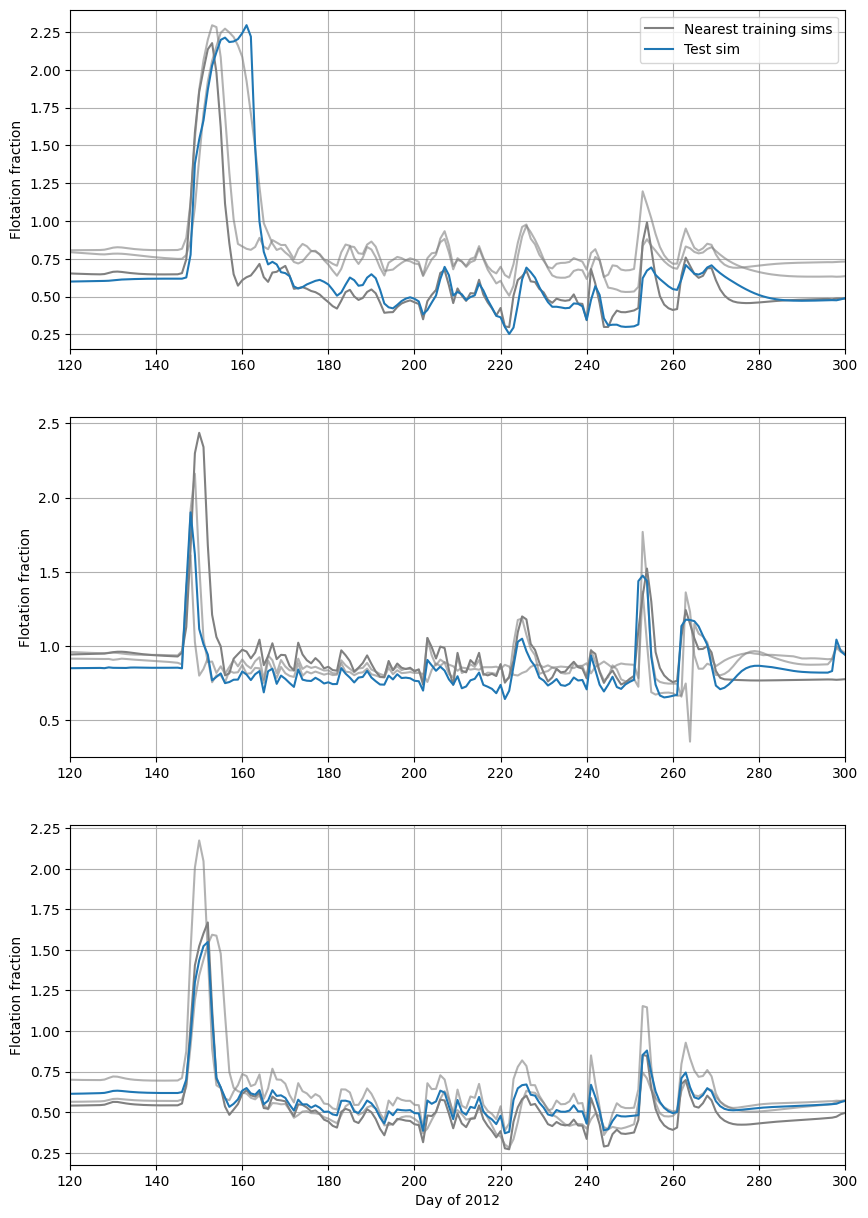

In [14]:
fig,axs = plt.subplots(figsize=(10, 15), nrows=3)
qq = np.array([0.95, 0.5, 0.025])
for i in range(3):
    qi = np.argmin(np.abs(y_test_neighb_dist - np.quantile(y_test_neighb_dist, qq[i])))
    
    ax = axs[i]
#     ax.plot(y_mean_neighbour_test[:, qi], color='gray', label='Nearest training sims')
    ax.plot(y_neighbour_test[:, qi, 0], color='gray', label='Nearest training sims', alpha=1.)
    ax.plot(y_neighbour_test[:, qi, 1:], color='gray', alpha=0.6)
    ax.plot(Y_test[:, qi], label='Test sim')
    ax.set_xlim([120, 300])
    ax.grid()
    ax.set_ylabel('Flotation fraction')

axs[0].legend(loc='upper right')
axs[-1].set_xlabel('Day of 2012')

Closest training run:
[0.7558869 0.8365366 0.476761  0.5207805 0.1909907 0.6518752 0.8417538
 0.8182391]
Test run:
[0.745 0.685 0.275 0.735 0.195 0.735 0.765 0.745]


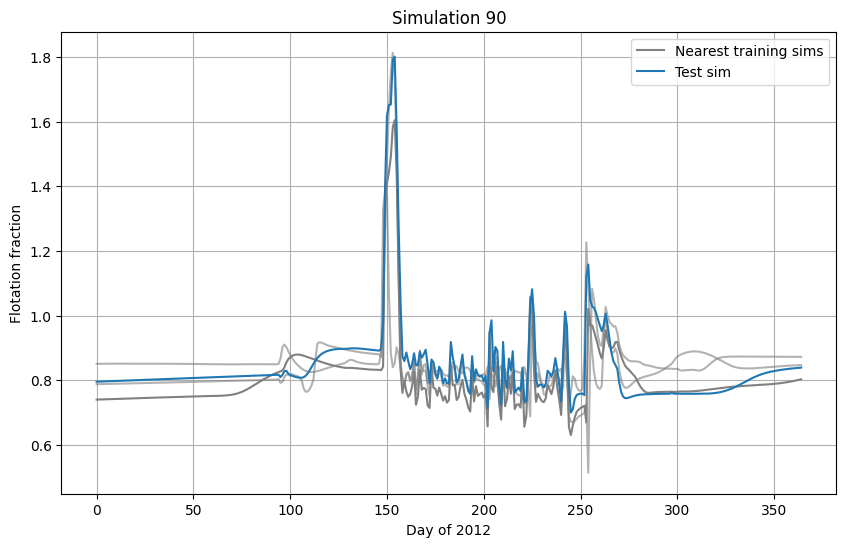

In [22]:
fig,ax = plt.subplots(figsize=(10, 6), nrows=1)
# qq = np.array([0.95, 0.5, 0.025])
# for i in range(3)
ax.plot(y_neighbour_test[:, sim_num, 0], color='gray', label='Nearest training sims', alpha=1)
ax.plot(y_neighbour_test[:, sim_num, 1:], color='gray', alpha=0.6)
ax.plot(Y_test[:, sim_num], label='Test sim')
# ax.set_xlim([120, 300])
ax.grid()
ax.set_ylabel('Flotation fraction')

ax.legend(loc='upper right')
ax.set_xlabel('Day of 2012')
ax.set_title('Simulation {:d}'.format(sim_num))

print('Closest training run:')
print(t_sim[np.argmin(sim_dist_test[:, 90])])
print('Test run:')
print(t_test[90])

Text(0.5, 1.0, 'Simulation 32')

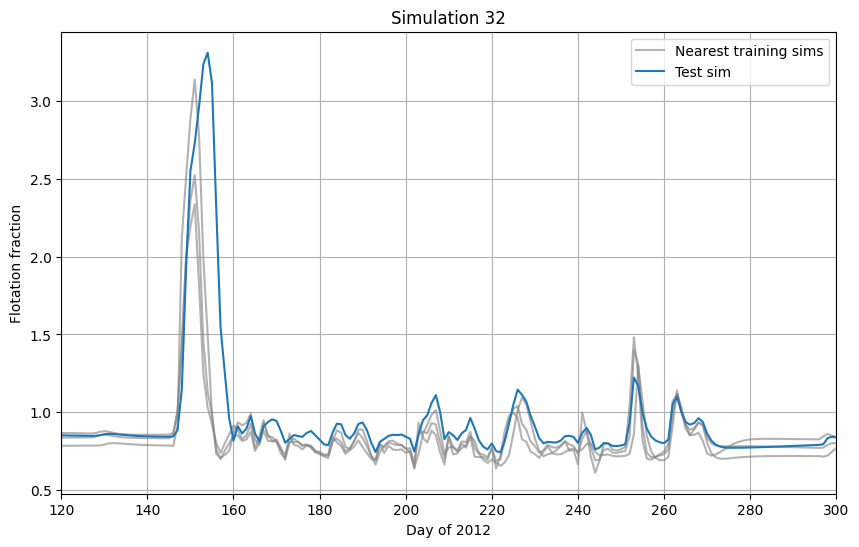

In [16]:
fig,ax = plt.subplots(figsize=(10, 6), nrows=1)
# qq = np.array([0.95, 0.5, 0.025])
# for i in range(3)
ax.plot(y_neighbour_test[:, 32, 0], color='gray', label='Nearest training sims', alpha=0.6)
ax.plot(y_neighbour_test[:, 32, 1:], color='gray', alpha=0.6)
ax.plot(Y_test[:, 32], label='Test sim')
ax.set_xlim([120, 300])
ax.grid()
ax.set_ylabel('Flotation fraction')

ax.legend(loc='upper right')
ax.set_xlabel('Day of 2012')
ax.set_xlabel('Day of 2012')
ax.set_title('Simulation 32')

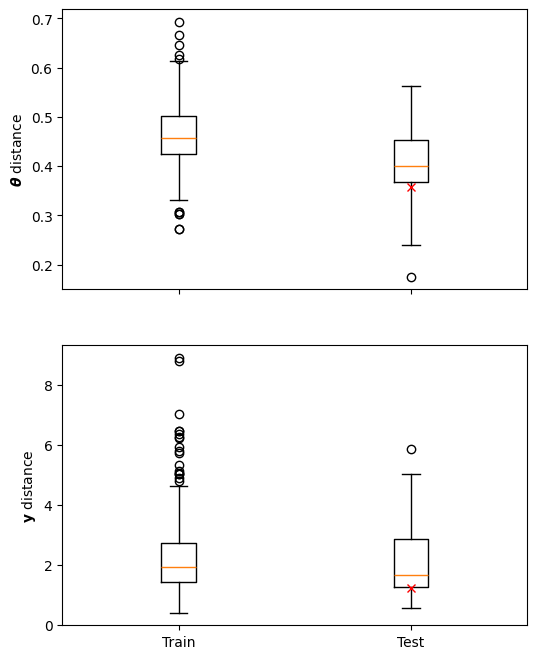

In [17]:
fig, axs = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)
axs[0].boxplot([min_dist_train, min_dist_test])
axs[1].boxplot([y_train_neighb_dist, y_test_neighb_dist])

axs[0].set_ylabel(r'$\boldsymbol{\theta}$ distance')
axs[1].set_ylabel(r'$\mathbf{y}$ distance')

axs[0].plot(2, min_dist_test[sim_num], 'rx')
axs[1].plot(2, y_test_neighb_dist[sim_num], 'rx')

axs[1].set_xticks([1,2], ['Train', 'Test'])

(365, 512)
Para norm:
1.2828250294966155
(100, 512)
[ 60 424 148]
[0.35757556 0.41395311 0.48461053]


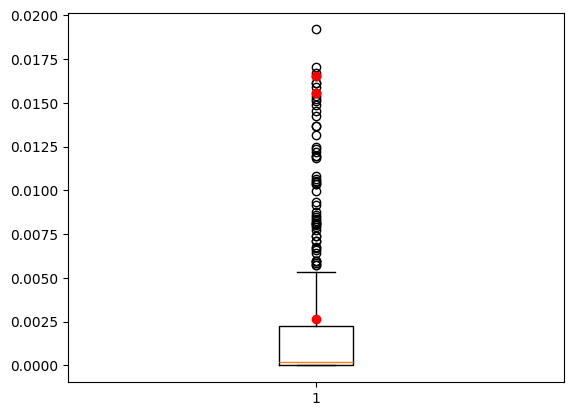

In [52]:
err = Y_sim - Y_test[:, 90:91]
print(err.shape)
sigma = np.sqrt(0.003)
likeli = np.exp(-0.5*np.mean(err[:,:]**2/sigma**2, axis=0))

likeli = likeli/np.sum(likeli)
fig,ax = plt.subplots()
ax.boxplot(likeli)



print('Para norm:')
print(np.linalg.norm(t_sim[ix] - t_test[90]))
dt_test_train = np.linalg.norm(t_sim[None,:,:] - t_test[:,None,:], axis=-1)
print(dt_test_train.shape)
neigh_train = np.argsort(dt_test_train, axis=1)
print(neigh_train[90, :3])
print(dt_test_train[90, neigh_train[90, :3]])

ax.plot([1,1,1], likeli[neigh_train[90, :3]], 'ro')

Text(0, 0.5, 'Likelihood')

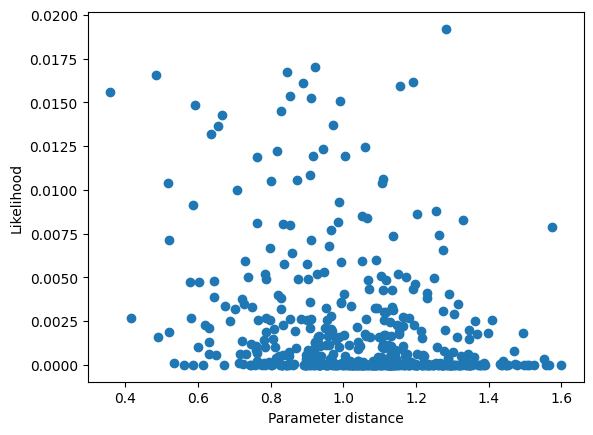

In [58]:
fig,ax = plt.subplots()
ax.scatter(dt_test_train[90], likeli)
ax.set_xlabel('Parameter distance')
ax.set_ylabel('Likelihood')

Most likely para:
0.0191982284822095
[0.07282206 0.5454741  0.7359934  0.08868533 0.4638451  0.5602316
 0.1042332  0.6766086 ]
True para:
[0.745 0.685 0.275 0.735 0.195 0.735 0.765 0.745]


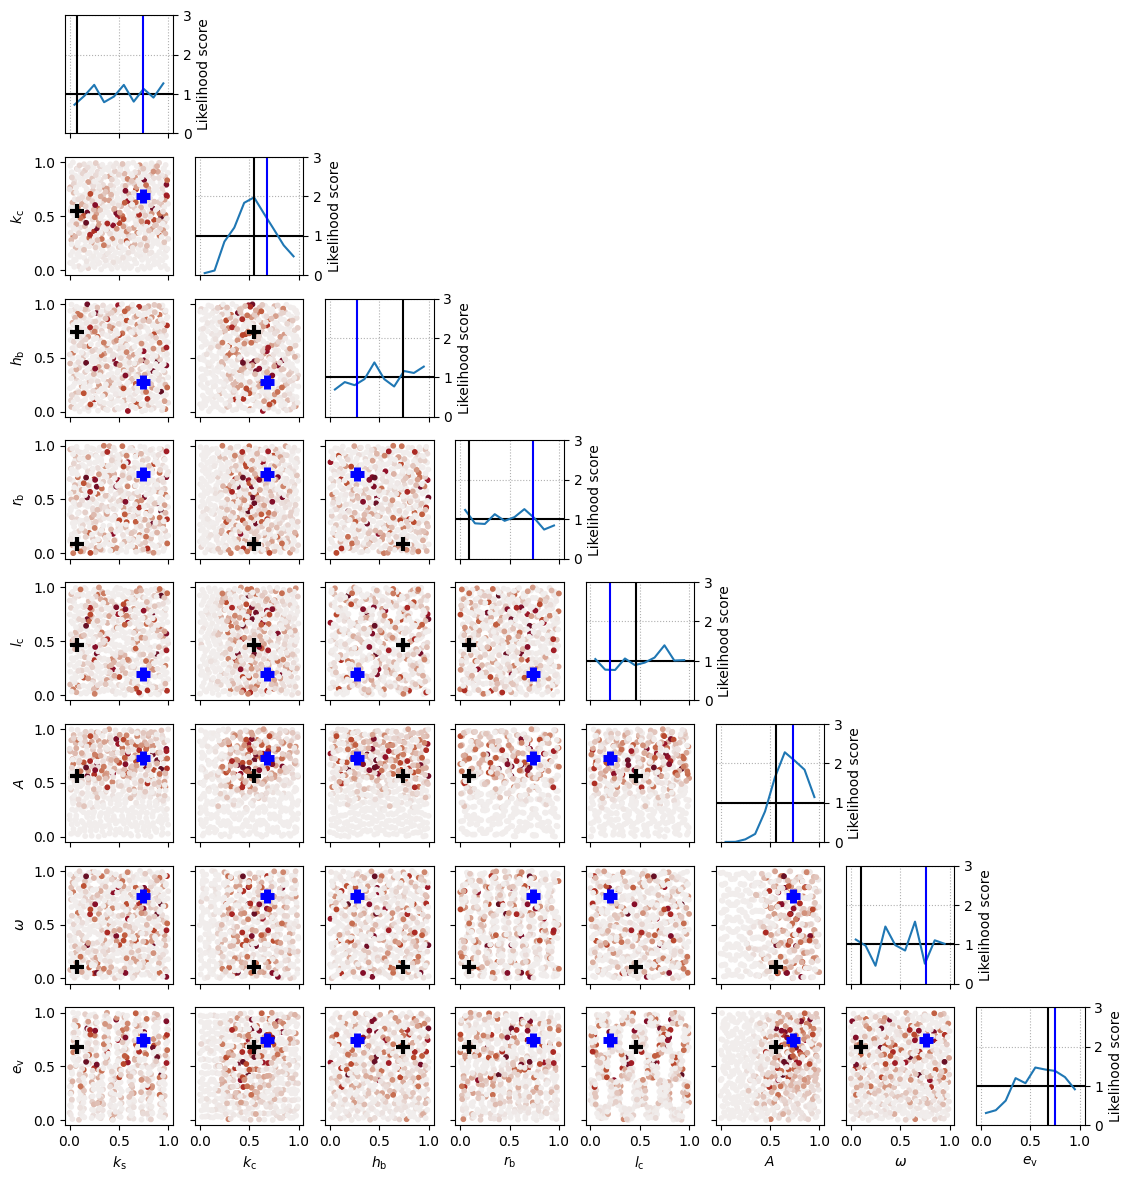

In [39]:
# t_sim = np.loadtxt('../issm/expdesign/greenland_train_standard.csv', delimiter=',', skiprows=1)[:m]

print('Most likely para:')
ix = np.argmax(likeli)
print(likeli[ix])
print(t_sim[ix])
print('True para:')
print(t_test[sim_num])

m = 512
t_names = np.loadtxt('../../expdesign/greenland_train_standard.csv', delimiter=',', max_rows=1, dtype=str)[:m]
fig,ax = plt.subplots(8,8,figsize=(12,12), sharex=True, sharey=False)
lmax = np.max(likeli)
dt = 0.1
thetas = np.arange(0, 1+dt, dt)
marginals = np.zeros((len(t_names), len(thetas)-1))
for i in range(len(t_names)):
    for j in range(len(thetas)-1):
        tmask = np.logical_and(t_sim[:,i]>=thetas[j], t_sim[:,i]<thetas[j+1])
        # print(len(np.where(tmask)[0]))
        marginals[i, j] = np.mean(likeli[tmask])

marginals = marginals/np.vstack(np.sum(marginals*dt, axis=1))
        
for axi in ax.flat:
    axi.set_visible(False)
for row in range(8):
    for col in range(row):
        ax[row,col].set_visible(True)
        sc = ax[row,col].scatter(t_sim[:,col], t_sim[:,row], 10, likeli, vmin=0, vmax=lmax, cmap=cmocean.cm.amp)
#         ax[row,col].axvline(t_test[sim_num, col], color='b')
        ax[row,col].plot(t_test[sim_num,col], t_test[sim_num,row], 'b+',
            markersize=10, markeredgewidth=5)
        ax[row,col].plot(t_sim[ix,col], t_sim[ix,row], 'k+',
            markersize=10, markeredgewidth=3)
        # print((row+1, col))
        if col==0:
            ax[row,col].set_ylabel(t_names[row])
        elif row!=col:
            ax[row,col].set_yticklabels([])
        if row==7:
            ax[row,col].set_xlabel(t_names[col])

    ax[row,row].set_visible(True)
    ax[row,row].axhline(1., color='k', label='prior')
    ax[row,row].plot(thetas[:-1] + 0.5*dt, marginals[row], label='posterior')
    # ax[row,row].set_ylim([0, 0.005])
    ax[row,row].set_ylim([0,3])
    ax[row,row].yaxis.tick_right()
    ax[row,row].yaxis.set_label_position('right')
    ax[row,row].set_ylabel('Likelihood score')
    ax[row,row].grid(linestyle=':')
    ax[row,row].set_xticks(np.linspace(0,1,3))
#     ax[row,row].plot(t_test)
    ax[row,row].axvline(t_test[sim_num, row], color='b')
    ax[row,row].axvline(t_sim[ix,row], color='k')

ax[-1,-1].set_xlabel(t_names[-1])

plt.subplots_adjust(left=0.05, right=0.9, bottom=0.05, top=0.975)
fig.savefig('likelihood_weighting_m512.png', dpi=300)
# fig.savefig('likelihood_weighting_prototype_para_dist_synthetic.png', dpi=300)

(365, 512)
(512,)
y_cal:
(365,)
0.05549511
rmse: 0.047871264953499255 0.055495124


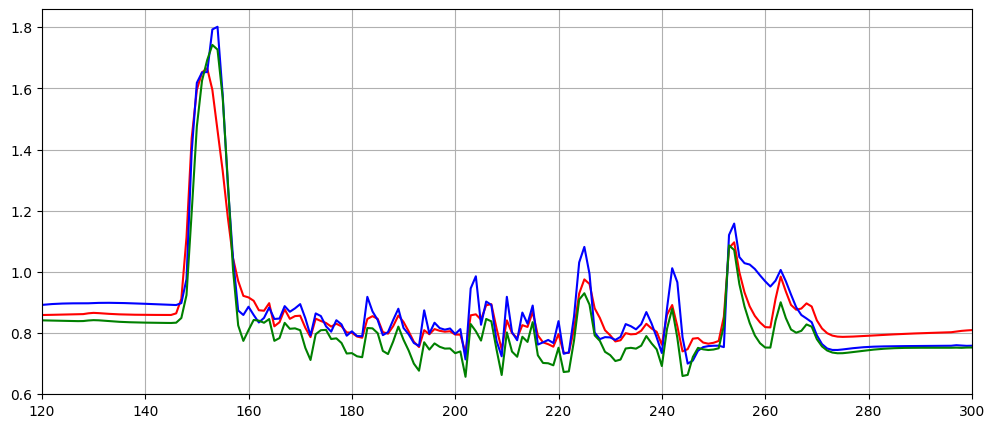

In [32]:
fig,ax = plt.subplots(figsize=(12, 5))
print(Y_sim.shape)
print(likeli.shape)
y_cal = np.sum(likeli*Y_sim, axis=1)
print('y_cal:')
print(y_cal.shape)
y_ml = Y_sim[:,ix]
ax.plot(y_cal, color='r')
ax.plot(Y_test[:, 90], color='b')
ax.plot(y_ml, color='g')
ax.grid()
ax.set_xlim([120, 300])

rmse_cal = np.sqrt(np.mean((y_cal-Y_test[:,90])**2))
rmse_ml = np.sqrt(np.mean((y_ml-Y_test[:,90])**2))
rmse = np.sqrt(np.mean((Y_sim - Y_test[:, 90:91])**2, axis=0))
print(np.min(rmse))
print('rmse:', rmse_cal, rmse_ml)

Most likely para:
[0.6554223  0.09385158 0.447356   0.401272   0.2064289  0.4213404
 0.3677427  0.1744447 ]
True para:
[0.385 0.235 0.295 0.645 0.035 0.495 0.845 0.255]


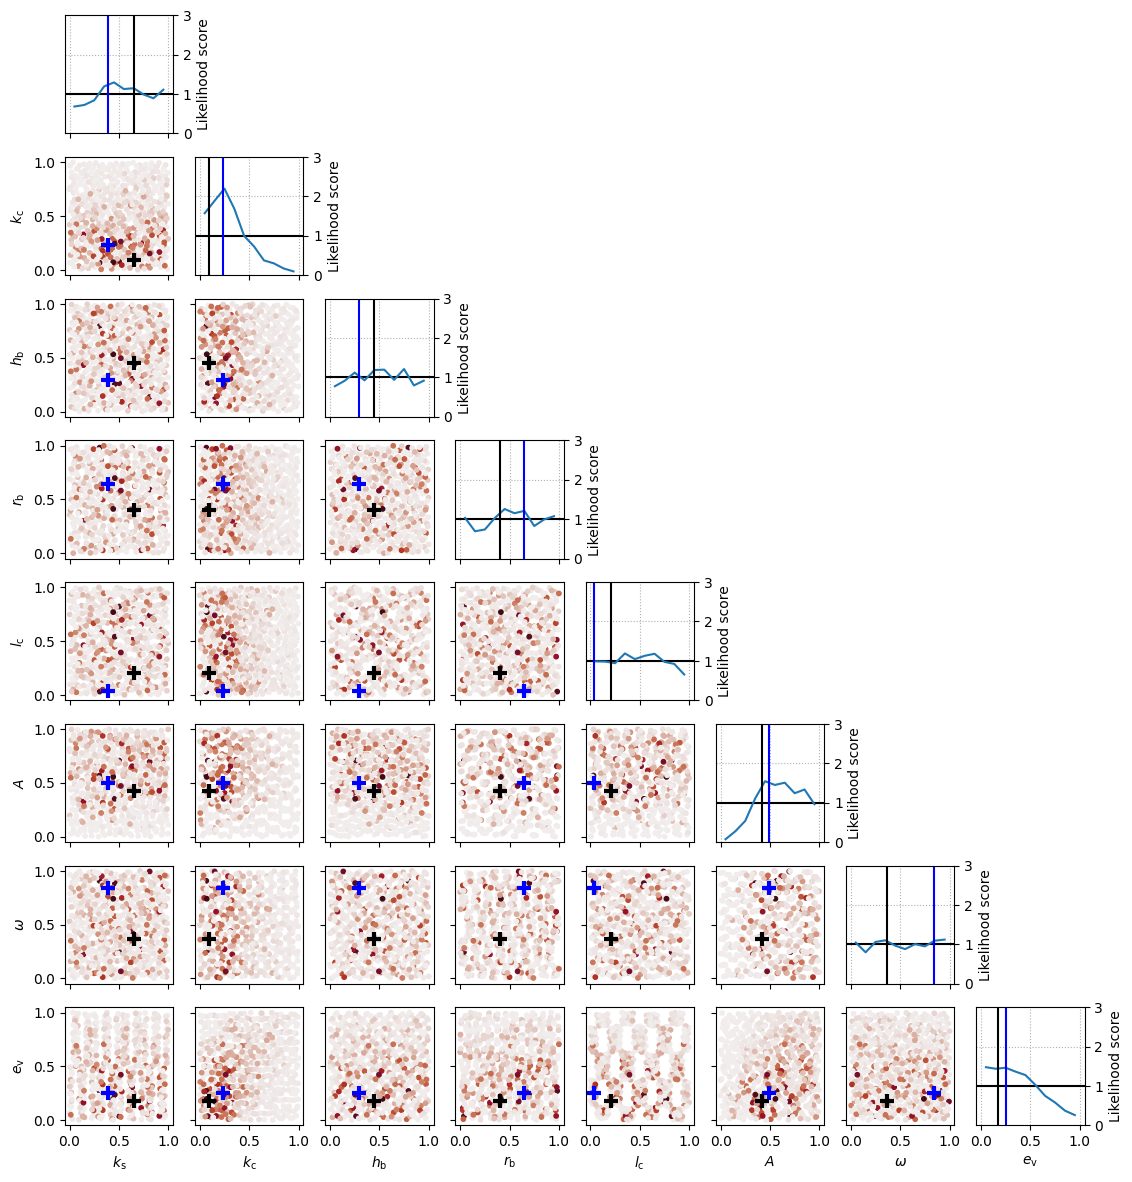

In [29]:
# t_sim = np.loadtxt('../issm/expdesign/greenland_train_standard.csv', delimiter=',', skiprows=1)[:m]
err = Y_sim - Y_test[:, 32:33]
sigma = np.sqrt(0.01)
likeli = np.exp(-0.5*np.mean(err**2/sigma**2, axis=0))

print('Most likely para:')
ix = np.argmax(likeli)
print(t_sim[ix])
print('True para:')
print(t_test[32])


m = 512
t_names = np.loadtxt('../../expdesign/greenland_train_standard.csv', delimiter=',', max_rows=1, dtype=str)[:m]
fig,ax = plt.subplots(8,8,figsize=(12,12), sharex=True, sharey=False)
lmax = np.max(likeli)
dt = 0.1
thetas = np.arange(0, 1+dt, dt)
marginals = np.zeros((len(t_names), len(thetas)-1))
for i in range(len(t_names)):
    for j in range(len(thetas)-1):
        tmask = np.logical_and(t_sim[:,i]>=thetas[j], t_sim[:,i]<thetas[j+1])
        # print(len(np.where(tmask)[0]))
        marginals[i, j] = np.mean(likeli[tmask])

marginals = marginals/np.vstack(np.sum(marginals*dt, axis=1))
        
for axi in ax.flat:
    axi.set_visible(False)
for row in range(8):
    for col in range(row):
        ax[row,col].set_visible(True)
        sc = ax[row,col].scatter(t_sim[:,col], t_sim[:,row], 10, likeli, vmin=0, vmax=lmax, cmap=cmocean.cm.amp)
#         ax[row,col].axvline(t_test[sim_num, col], color='b')
        ax[row,col].plot(t_test[32,col], t_test[32,row], 'b+',
            markersize=10, markeredgewidth=3)
        ax[row,col].plot(t_sim[ix,col], t_sim[ix,row], 'k+',
            markersize=10, markeredgewidth=3)
        # print((row+1, col))
        if col==0:
            ax[row,col].set_ylabel(t_names[row])
        elif row!=col:
            ax[row,col].set_yticklabels([])
        if row==7:
            ax[row,col].set_xlabel(t_names[col])

    ax[row,row].set_visible(True)
    ax[row,row].axhline(1., color='k', label='prior')
    ax[row,row].plot(thetas[:-1] + 0.5*dt, marginals[row], label='posterior')
    # ax[row,row].set_ylim([0, 0.005])
    ax[row,row].set_ylim([0,3])
    ax[row,row].yaxis.tick_right()
    ax[row,row].yaxis.set_label_position('right')
    ax[row,row].set_ylabel('Likelihood score')
    ax[row,row].grid(linestyle=':')
    ax[row,row].set_xticks(np.linspace(0,1,3))
#     ax[row,row].plot(t_test)
    ax[row,row].axvline(t_test[32, row], color='b')
    ax[row,row].axvline(t_sim[ix,row], color='k')

ax[-1,-1].set_xlabel(t_names[-1])

plt.subplots_adjust(left=0.05, right=0.9, bottom=0.05, top=0.975)
fig.savefig('likelihood_weighting_m512_i32.png', dpi=300)
# fig.savefig('likelihood_weighting_prototype_para_dist_synthetic.png', dpi=300)